In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv("Downloads/titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column.

In [4]:
data=pd.read_csv("Downloads/titanic_dataset.csv",index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.shape

(891, 11)

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


insights: 
1)There are 891 rows and 11 columns.
2)Age and fare are of float type and Survived,Pclass,SibSp and Parch are  of int type.
3)Out of these 11 columns: age,cabin and embarked has missing values. In cabin column only 22% of teh data is available.

# 4. Fill in all the missing values present in all the columns in the dataset.

In [10]:
data['Age']=data['Age'].fillna(data['Age'].median())
data["Cabin"]=data["Cabin"].fillna(value='unknown')
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])


In [11]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Age')

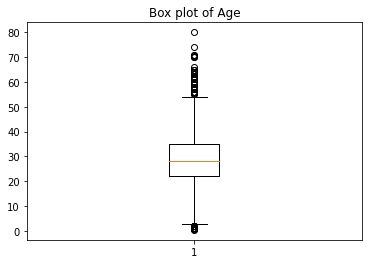

In [12]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [13]:
Q1= np.percentile(data['Age'],25,interpolation='midpoint')
Q2= np.percentile(data['Age'],50,interpolation='midpoint')
Q3= np.percentile(data['Age'],75,interpolation='midpoint')

IQR=Q3-Q1

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)
 
outlier=[]
for i in data['Age']:
    if((i>up_lim) or(i<low_lim)):
        outlier.append(i)

2.5
54.5


In [14]:
ind1=data['Age']>up_lim
data.loc[ind1].index



Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [15]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

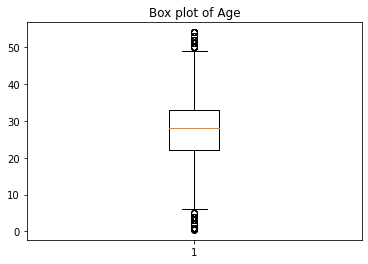

In [16]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [17]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of SibSp')

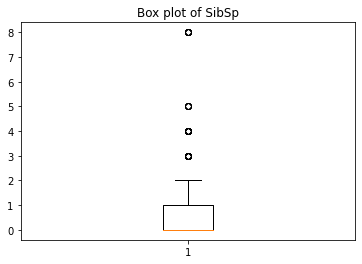

In [18]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [19]:
Q1= np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2= np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3= np.percentile(data['SibSp'],75,interpolation='midpoint')

IQR=Q3-Q1

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)
 
outlier=[]
for i in data['SibSp']:
    if((i>up_lim) or(i<low_lim)):
        outlier.append(i)


-1.5
2.5


In [20]:
ind1=data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

Text(0.5, 1.0, 'Box plot of SibSp')

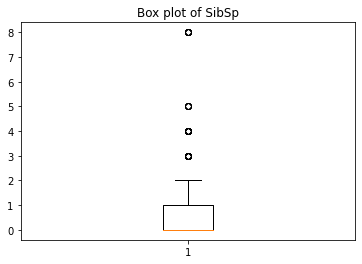

In [21]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Fare')

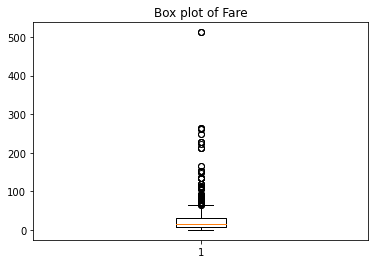

In [22]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [23]:
Q1= np.percentile(data['Fare'],25,interpolation='midpoint')
Q2= np.percentile(data['Fare'],50,interpolation='midpoint')
Q3= np.percentile(data['Fare'],75,interpolation='midpoint')

IQR=Q3-Q1

low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print(low_lim)
print(up_lim)
 
outlier=[]
for i in data['Fare']:
    if((i>up_lim) or(i<low_lim)):
        outlier.append(i)
    

-26.0105
64.4063


In [24]:
ind1=data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [25]:
data.drop([2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 156, 780, 790, 803, 821,
            836, 850, 857],inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

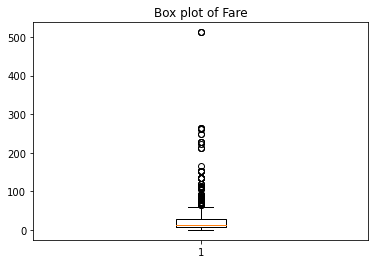

In [26]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [27]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [28]:

x=data.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [29]:
data= pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_unknown,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
y=data['Survived']
x=data.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))

from sklearn.metrics import r2_score
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.1284741287977837
R squared value is  0.44586839188967065


In [31]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
x = min_max.fit_transform(x)
print(x)
x=pd.DataFrame(x)
x.describe()

[[2.         0.80552445 0.25       ... 0.         0.         2.        ]
 [2.         0.95483389 0.         ... 0.         0.         2.        ]
 [0.         1.29078014 0.25       ... 0.         0.         2.        ]
 ...
 [2.         1.02948862 0.25       ... 0.         0.         2.        ]
 [0.         0.95483389 0.         ... 2.         0.         0.        ]
 [2.         1.17879806 0.         ... 0.         2.         0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,...,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,1.375451,1.013191,0.135078,0.127958,0.117921,0.002407,0.002407,0.002407,0.002407,0.002407,...,0.007220,0.007220,0.002407,0.004813,0.009627,0.002407,1.598075,0.356197,0.178099,1.465704
std,0.805747,0.407138,0.283375,0.270985,0.190964,0.069379,0.069379,0.069379,0.069379,0.069379,...,0.120023,0.120023,0.069379,0.098058,0.138507,0.069379,0.801923,0.765652,0.569973,0.885474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.805524,0.000000,0.000000,0.030823,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,1.029489,0.000000,0.000000,0.050749,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,1.216125,0.250000,0.000000,0.113696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('R squared value is ', r2_score(y_test, pred))

MSE is  0.12812131173135202
R squared value is  0.447390154210381


insights:minmax doesn't affect R squared value.